## Quin Daly
#### Math 402
#### Homework 5.1

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
import pandas as pd
import statistics as stats
import time

### Exercise 5.2

In [166]:
def OLS(X,y):
    return la.solve(X.T @ X, X.T @ y)

In [168]:
X

array([[1.00000000e+00, 4.09092593e-01],
       [1.00000000e+00, 7.99688003e-01],
       [1.00000000e+00, 4.53152108e-01],
       [1.00000000e+00, 2.51228679e-01],
       [1.00000000e+00, 1.92776033e-01],
       [1.00000000e+00, 6.72609765e-01],
       [1.00000000e+00, 6.98176322e-01],
       [1.00000000e+00, 2.73924303e-02],
       [1.00000000e+00, 2.87825050e-01],
       [1.00000000e+00, 2.27997043e-01],
       [1.00000000e+00, 5.73860882e-01],
       [1.00000000e+00, 2.70365339e-01],
       [1.00000000e+00, 4.33588331e-01],
       [1.00000000e+00, 1.54100183e-01],
       [1.00000000e+00, 9.71499074e-01],
       [1.00000000e+00, 2.04481108e-01],
       [1.00000000e+00, 1.19254665e-01],
       [1.00000000e+00, 9.90589173e-01],
       [1.00000000e+00, 5.72135734e-01],
       [1.00000000e+00, 6.51107951e-01],
       [1.00000000e+00, 4.41250621e-01],
       [1.00000000e+00, 4.90808651e-01],
       [1.00000000e+00, 3.87736809e-01],
       [1.00000000e+00, 6.55161199e-01],
       [1.000000

In [167]:
# Part 1:
n = 100
X = np.hstack([np.ones((n,1)), np.random.random((n,1))])
beta = [2,0.5]
e = 0.1 * np.random.randn(n)
y = np.dot(X, beta) + e
beta_hat = OLS(X,y)

print('abs(beta - beta_hat) = ' + str(np.abs(beta - beta_hat)))


abs(beta - beta_hat) = [0.02299411 0.01842639]


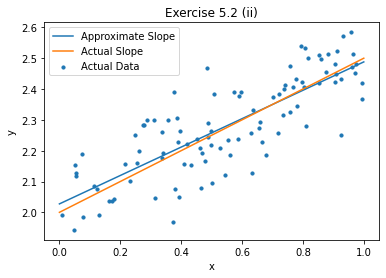

In [37]:
# Part 2:
x = np.linspace(0,1,n)
plt.scatter(X[:,1], y, s=10, label='Actual Data')
plt.plot(x, beta_hat[0] + beta_hat[1]*x, label='Approximate Slope')
plt.plot(x, beta[0] + beta[1]*x, label='Actual Slope')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exercise 5.2 (ii)')
plt.legend()
plt.show()

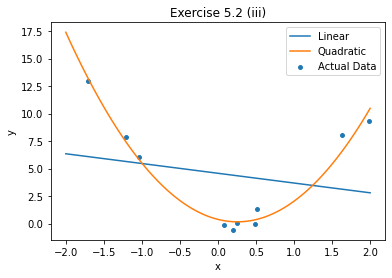

In [71]:
# Part 3:
xi = np.array([-1.7070417,0.48566752,1.62940736,-1.03619688,0.5160501,0.0729243,
     0.19432016,1.98853255,-1.20937744,0.24718355])
yi = np.array([12.97711586,-0.07882501,8.01895309,6.0190389,1.28260097,-0.15612727,
     -0.5740016,9.29385226,7.86261889,0.05378747])
n = len(xi)
X = np.hstack([np.ones((n,1)), xi.reshape(n,1)])
beta_hat = OLS(X, yi)
X2 = np.hstack([np.ones((n,1)), xi.reshape(n,1), (xi**2).reshape(n,1)])
beta_hat2 = OLS(X2, yi)

# Plot the approximations
x = np.linspace(-2,2,100)
plt.scatter(xi,yi,label='Actual Data',s=15)
plt.plot(x, beta_hat[0] + beta_hat[1]*x, label='Linear')
plt.plot(x, beta_hat2[0] + beta_hat2[1]*x + beta_hat2[2]*x**2, label='Quadratic')
plt.legend()
plt.title('Exercise 5.2 (iii)')
plt.xlabel('x')
plt.ylabel('y')

plt.show()


In [79]:
# Part 4:
n = int(10e6)
beta = [1,-2,3,-4]
e = 0.5*np.random.randn(n)
var = np.random.random((n,1))
X = np.hstack([np.ones((n,1)), var, var**2, var**3])
y = np.dot(X, beta) + e

beta_hat = OLS(X, y)
print('abs(beta - beta_hat) = ' + str(np.abs(beta - beta_hat)))

abs(beta - beta_hat) = [0.00035114 0.00253435 0.00415763 0.0025039 ]


### Exercise 5.3

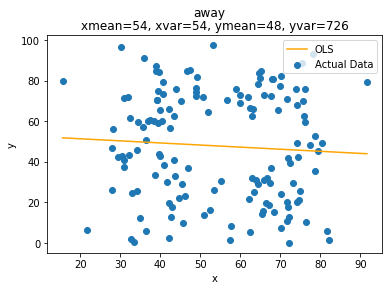

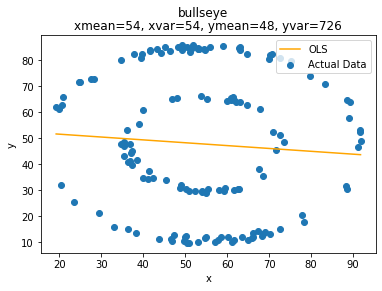

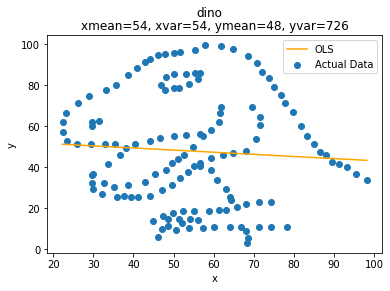

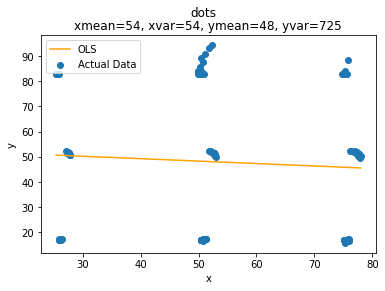

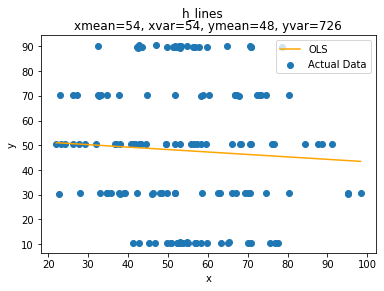

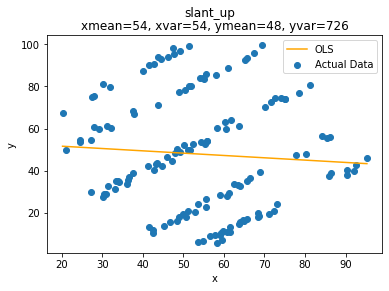

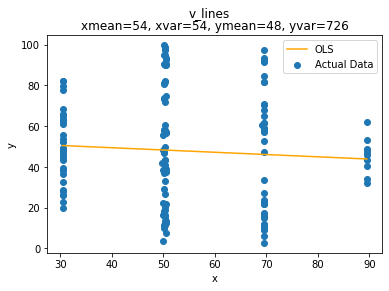

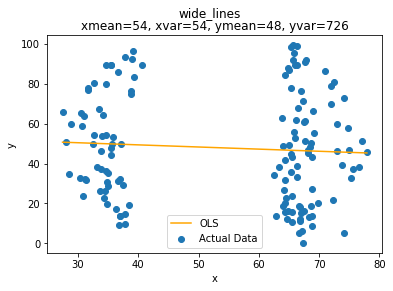

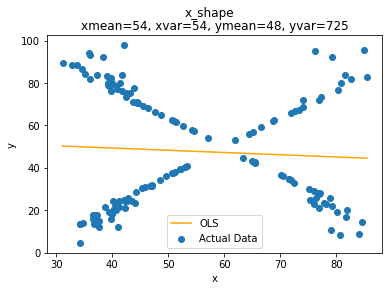

Despite the different data points, the mean and variance for x and y are exactly the same, and the regression line given by OLS() is the exact same as well. This shows that linear regression might not be the best analytical tool to use on all data. There should be some type of linear relationship between the data in order to justify using it.


In [108]:
# Load the data:
df = pd.read_csv('Datasaurus_Dozen.tsv', sep='\t', header=0)

# Run the OLS solver on each of the datasets in df['dataset']
x_arrays = []
y_arrays = []
datasets = np.unique(df.dataset)
for data in datasets:
    # Extract the X and y vectors, create X matrix
    new_array = df[df['dataset'] == data]
    x_vals = list(new_array['x'])
    y = new_array['y']
    y = y.to_numpy()
    X = np.hstack([np.array([1, x]) for x in x_vals])
    X = X.reshape((int(X.shape[0]/2),2))
    
    # Solve, compute mean and variance for x and y
    beta_hat = OLS(X, y)
    xmean = round(stats.mean(x_vals))
    xvar = round(stats.mean(x_vals))
    ymean = round(stats.mean(y))
    yvar = round(stats.variance(y))
    
    # Plot the data with regression line from OLS
    domain = np.linspace(min(x_vals), max(x_vals), 200)
    plt.scatter(x_vals, y, label='Actual Data')
    plt.plot(domain, beta_hat[0] + beta_hat[1]*domain, label='OLS', color='orange')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('xmean=' + str(xmean) + ', xvar=' + str(xvar)
             + ', ymean=' + str(ymean) + ', yvar=' + str(yvar))
    plt.suptitle(data)
    plt.show()
    
# Print out observations
print('Despite the different data points, the mean and variance for x and y are exactly the same, '
     'and the regression line given by OLS() is the exact same as well. This shows that linear regression '
     'might not be the best analytical tool to use on all data. There should be some type of linear '
     'relationship between the data in order to justify using it.')

### Exercise 5.4

In [157]:
def LS_SVD(X,y):
    U,S,Vt = la.svd(X, full_matrices=False)
    #U = U[:2,:2]
    return Vt.T @ la.inv(np.diag(S)) @ U.T[:6,:6] @ y[:6]

In [148]:
# Part 1:
# Using exercise 2(i)
n = 100
X = np.hstack([np.ones((n,1)), np.random.random((n,1))])
beta = [2,0.5]
e = 0.1 * np.random.randn(n)
y = np.dot(X, beta) + e
start = time.time()
beta_hat = LS_SVD(X,y)
svd_time = time.time() - start

start = time.time()
OLS(X,y)
ols_time = time.time() - start

print('abs(beta - beta_hat) = ' + str(np.abs(beta - beta_hat)))
print('SVD time: ' + str(round(svd_time,4)) + ' seconds')
print('OLS time: ' + str(round(ols_time,4)) + ' seconds')

abs(beta - beta_hat) = [1.98989997 0.42906253]
SVD time: 0.0008 seconds
OLS time: 0.0004 seconds


In [151]:
# Part 1:
# Using exercise 2(iii)
xi = np.array([-1.7070417,0.48566752,1.62940736,-1.03619688,0.5160501,0.0729243,
     0.19432016,1.98853255,-1.20937744,0.24718355])
yi = np.array([12.97711586,-0.07882501,8.01895309,6.0190389,1.28260097,-0.15612727,
     -0.5740016,9.29385226,7.86261889,0.05378747])
n = len(xi)
X = np.hstack([np.ones((n,1)), xi.reshape(n,1)])
beta_hat = OLS(X, yi)
X2 = np.hstack([np.ones((n,1)), xi.reshape(n,1), (xi**2).reshape(n,1)])
start = time.time()
beta_hat2 = OLS(X2, yi)
ols_time = time.time() - start

start = time.time()
beta_hat2 = LS_SVD(X2, yi)
svd_time = time.time() - start

print('abs(beta - beta_hat) = ' + str(np.abs(beta - beta_hat)))
print('SVD time: ' + str(round(svd_time,4)) + ' seconds')
print('OLS time: ' + str(round(ols_time,4)) + ' seconds')

abs(beta - beta_hat) = [2.57476609 1.38757887]
SVD time: 0.0003 seconds
OLS time: 0.0002 seconds


In [155]:
# Part 1:
# Using exercise 2(iv)
n = int(10e6)
beta = [1,-2,3,-4]
e = 0.5*np.random.randn(n)
var = np.random.random((n,1))
X = np.hstack([np.ones((n,1)), var, var**2, var**3])
y = np.dot(X, beta) + e

start = time.time()
beta_hat = OLS(X, y)
ols_time = time.time() - start

start = time.time()
beta_hat = LS_SVD(X,y)
svd_time = time.time() - start

print('abs(beta - beta_hat) = ' + str(np.abs(beta - beta_hat)))
print('SVD time: ' + str(round(svd_time,4)) + ' seconds')
print('OLS time: ' + str(round(ols_time,4)) + ' seconds')

abs(beta - beta_hat) = [1.00000042 2.00000661 3.00001656 4.00001015]
SVD time: 1.6121 seconds
OLS time: 0.0592 seconds


In [164]:
# Part 2:
n = 10**3
Z = np.random.random((n,3))
X = np.hstack([Z,Z])
beta = [1,-2,3,-4,5,-6]
e = np.random.randn(n)
y = np.dot(X, beta) + e

beta_hat = LS_SVD(X, y)

print('abs(beta - beta_hat) = ' + str(np.abs(beta - beta_hat)))
x = np.linspace(min(y), max(y), n)
y_hat = beta_hat[0] + beta_hat[1]*x + beta_hat[2]*x + beta_hat[3]*x + beta_hat[4]*x + beta_hat[5]*x
print('Norm of Residuals: ' + str(la.norm(y - y_hat)))


abs(beta - beta_hat) = [1.59663019e+15 4.04904509e+14 9.58319302e+13 1.59663019e+15
 4.04904509e+14 9.58319302e+13]
Norm of Residuals: 2.2315677467833677e+17
